In [13]:
import pandas as pd
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.nn.functional as F
import torch.nn as nn
 
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

In [2]:
#read the data
train_dataset = pd.read_csv('internship_train.csv')
test_dataset = pd.read_csv('internship_hidden_test.csv ')

#shuffle train examples
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)

In [3]:
print(train_dataset.shape)

(90000, 54)


In [4]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,73,17,277,165,452,466,-4.690416,0.173518,0,151,...,5.755366,11.934692,1.574929,2.474494,11.413971,7.741042,13.680590,14.827075,4.841634,22.173518
1,216,150,349,408,147,407,9.055385,0.625420,1,48,...,10.478571,1.600843,5.355678,2.622674,8.455630,2.868295,10.446200,13.501893,9.431570,82.625420
2,378,5,26,19,179,216,-9.591663,0.066201,0,294,...,5.884043,1.785238,9.133421,9.128296,3.918428,0.993240,3.235574,0.514233,4.460592,92.066201
3,121,86,106,42,73,288,7.211103,0.729887,1,40,...,4.510157,6.531139,3.474818,13.679764,2.780882,10.091550,7.156541,2.205834,5.791034,52.729887
4,163,25,496,488,80,397,-6.855655,0.316901,0,340,...,11.923713,6.458386,0.695021,2.837642,4.390960,2.306183,4.979947,3.659732,4.247538,47.316901


In [5]:
train_dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [6]:
#check whether there are any “not a number” values in train dataset

train_dataset.isna().any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
target    False
dtype: bool

In [7]:
#check whether there are any “not a number” values in test dataset

test_dataset.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
dtype: bool

In [8]:
print(test_dataset.shape)

(10000, 53)


<AxesSubplot:xlabel='target', ylabel='Count'>

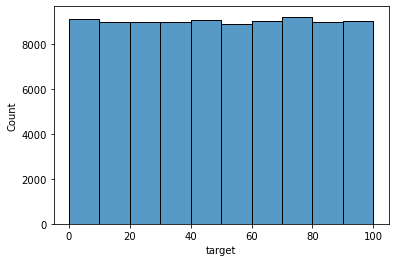

In [9]:
#histogram of target distribution
sns.histplot(data=train_dataset['target'], bins=10)

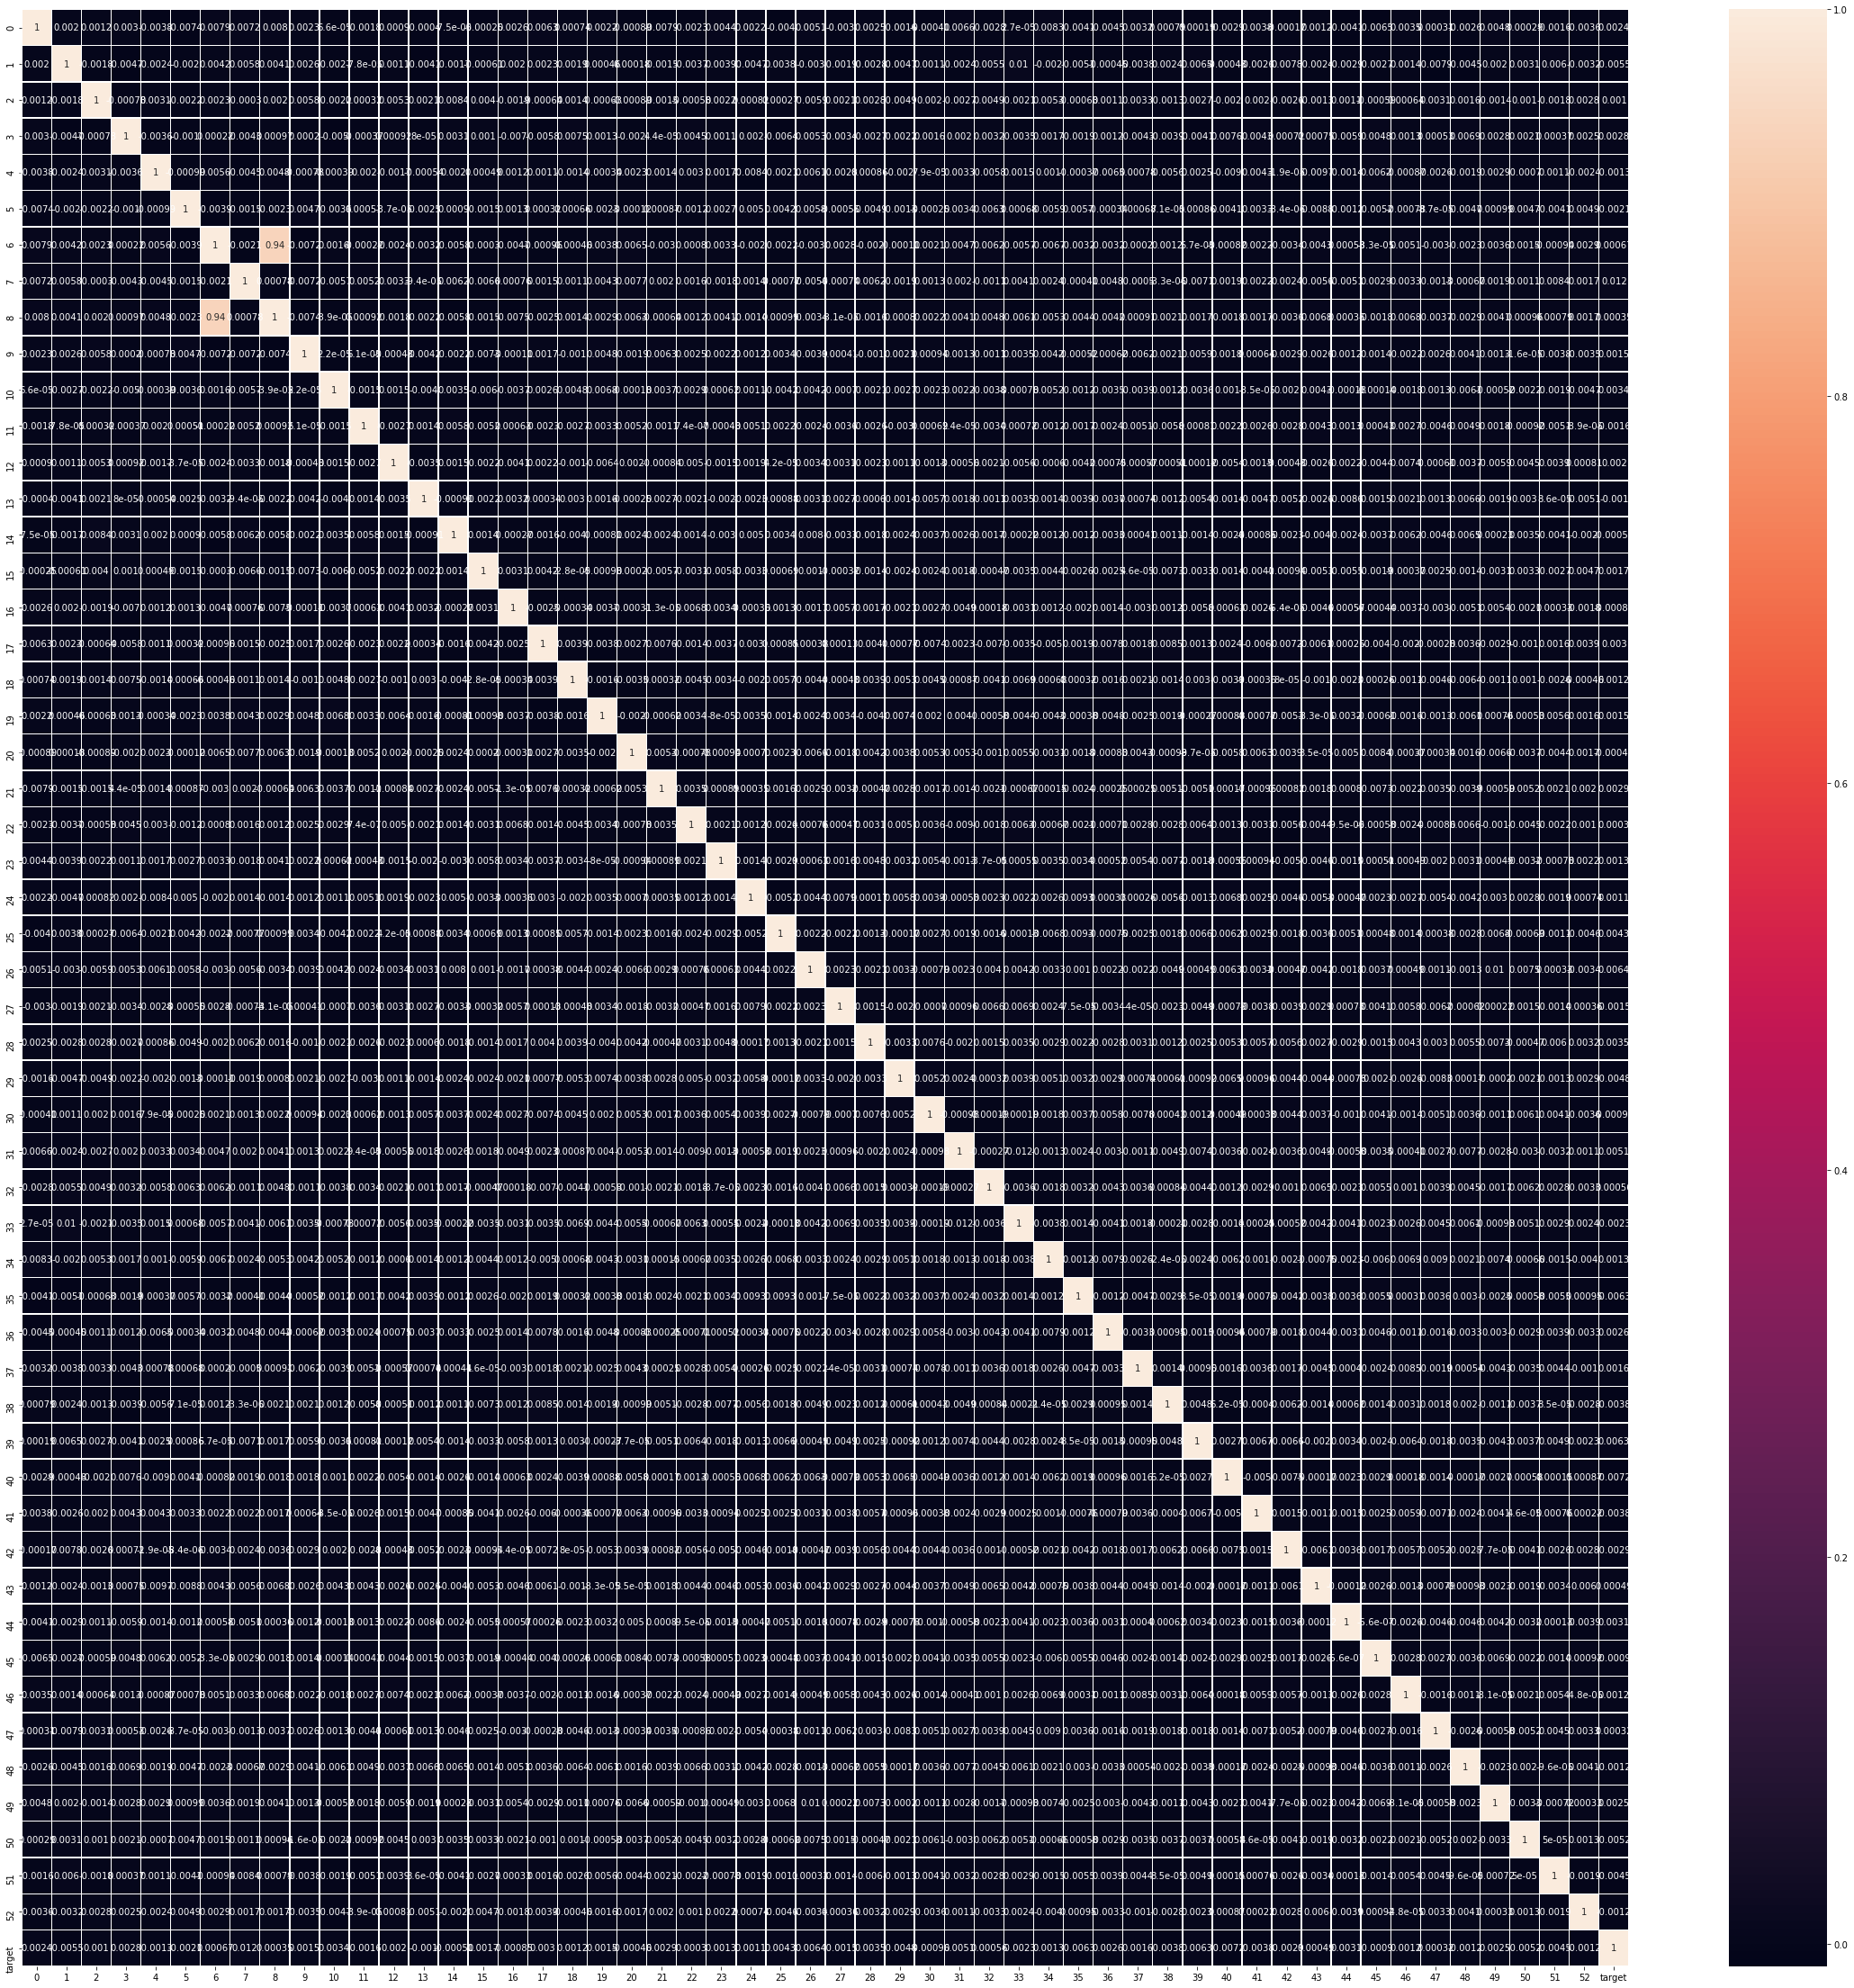

In [10]:
# explore the correlation between given variables using a correlation matrix

fig, ax = plt.subplots(figsize=(40, 40))         

corrMatrix = train_dataset.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [11]:
#we can see that features '6' and '8' are highly correlated
#thus, we can omit one of these variables, say we omit feature '8'

train_dataset = train_dataset.drop(['8'], axis=1)

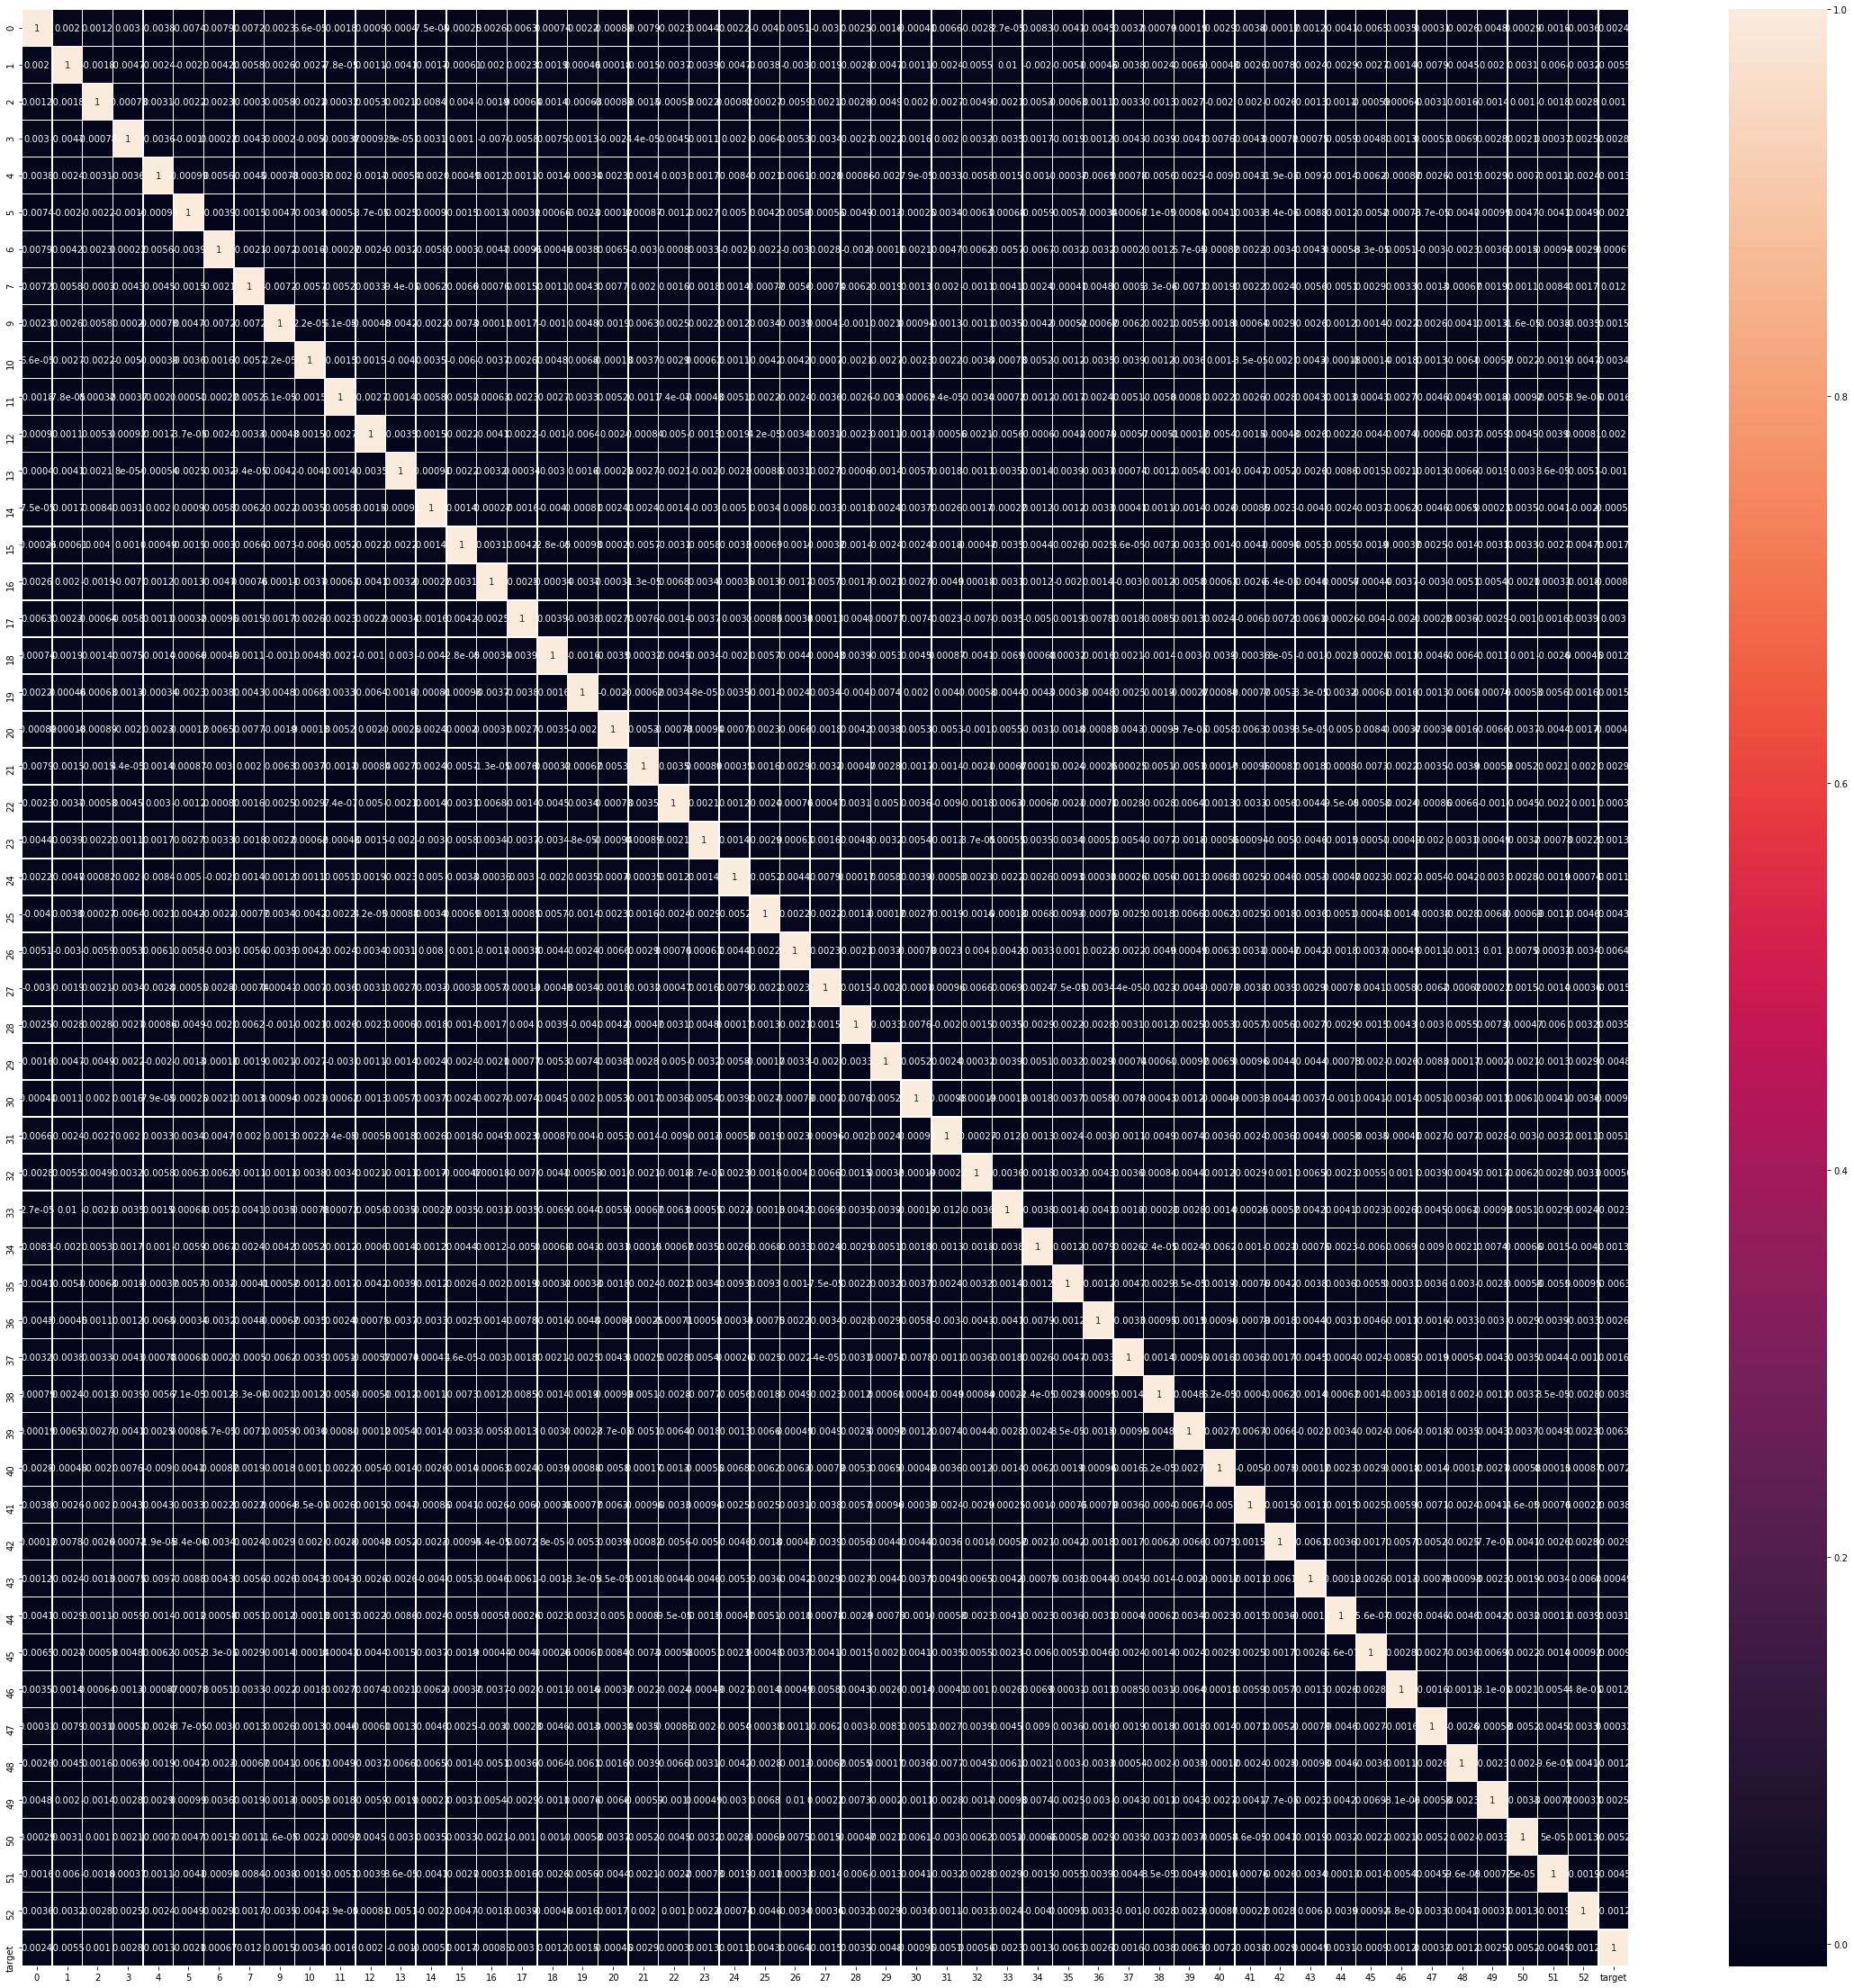

In [12]:
fig, ax = plt.subplots(figsize=(40, 40))         

corrMatrix = train_dataset.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()